In [1]:
import numpy as np # imports a fast numerical programming library
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
from sklearn.model_selection import train_test_split
import time

In [2]:
#exploratory data analysis
dfdata=pd.read_csv("first_training_data.csv")
dfdata.columns

Index(['Parameter1', 'Parameter2', 'Parameter3', 'Parameter4', 'Parameter5',
       'Parameter6', 'Parameter7', 'Parameter8', 'Parameter9', 'Parameter10',
       'Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
       'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
       'Quality_label'],
      dtype='object')

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


<Figure size 144x144 with 0 Axes>

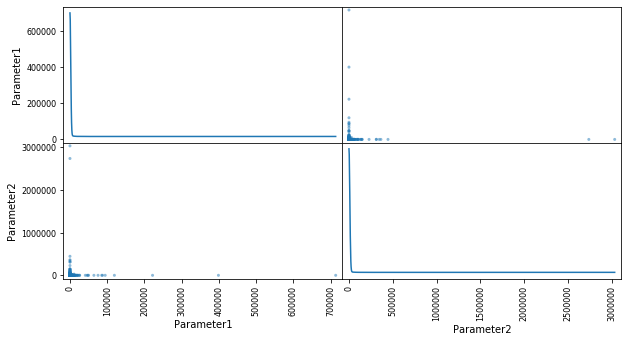

In [3]:
from pandas.plotting import scatter_matrix
plt.figure(figsize=(2,2))
fig, ax = plt.subplots(1,1, figsize=(10,5))
axes = scatter_matrix(dfdata[['Parameter1', 'Parameter2']], alpha=0.5, diagonal='kde', ax=ax)

(array([876.,   6.,   2.,   1.,   1.,   0.,   3.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   2.]),
 array([3.83285471e-05, 1.05946086e+03, 2.11892168e+03, 3.17838251e+03,
        4.23784333e+03, 5.29730415e+03, 6.35676498e+03, 7.41622580e+03,
        8.47568662e+03, 9.53514744e+03, 1.05946083e+04, 1.16540691e+04,
        1.27135299e+04, 1.37729907e+04, 1.48324516e+04, 1.58919124e+04]),
 <a list of 15 Patch objects>)

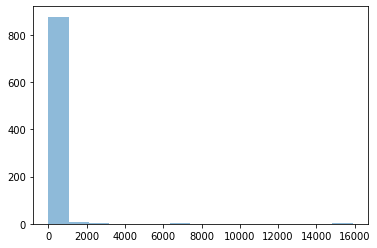

In [4]:
plt.hist(dfdata[dfdata['Quality_label']=="Fail"].Parameter3.values, bins=15, alpha=0.5)

In [5]:
data=pd.read_csv("first_training_data.csv")
data.head(100)

,Parameter1,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9,Parameter10,...,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Quality_label
0,0.001660,0.591013,147.608373,38.186345,0.000421,0.000612,2286.523413,0.035407,0.593081,1.010385,...,0.168761,1.098755,36.955992,8.454598,11.438066,177.243120,338.729256,2.021704,0.079526,Pass
1,1.601749,0.015052,0.035864,51.130326,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,...,11.649033,0.066671,225.632949,0.481860,20597.447822,3.723330,15.376190,0.986973,4.634376,Fail
2,0.098039,69.233685,0.080920,0.112265,0.000909,0.001972,2286.523413,0.035407,0.593081,1.010385,...,0.078213,110.079689,2.208138,0.073525,236.079314,0.064196,0.576302,33.875790,1.813727,Fail
3,18.181860,0.047325,0.018061,1.098102,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,...,0.380281,0.011491,0.654517,0.025872,176.948915,0.029777,0.246726,27.117165,0.081819,Fail
4,0.012085,0.008749,0.005509,524.327396,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,...,1.555672,38.613386,0.260989,0.009380,194.798039,0.055053,0.014725,13.569707,18.138496,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.749375,9.269163,0.000406,0.510580,7.456215,12.777380,0.152059,0.035407,0.593081,37.407054,...,52.341864,2.925608,0.218443,0.049883,10.390009,0.013219,0.016429,1315.725395,12.183069,Pass
96,0.151515,0.114073,4.004610,0.674398,7.456215,10.513382,0.152059,0.035407,0.593081,37.407054,...,0.197832,205.250802,0.372554,0.019778,114.824049,0.055053,0.046476,7.876382,0.034872,Fail
97,2.455755,0.001798,3.716348,15.755484,7.456215,10.513382,0.152059,0.035407,0.593081,37.407054,...,2165.984417,0.115229,2.717631,0.228517,55.848020,0.766699,0.969314,3.234046,0.054955,Good
98,0.391458,768.446799,143.108119,0.853814,17.962176,27.876563,0.152059,0.035407,0.593081,37.407054,...,0.073839,0.018120,0.293863,0.051394,15.260285,0.224301,0.215174,0.070033,0.166535,Pass


In [6]:
diction = dict(Fail=0, Pass=1,Good=2,Excellent=3)
data['Quality_label'] = data['Quality_label'].apply(lambda x: diction[x])

In [7]:
pdata=data
pdata=pdata.drop(["Quality_label"],axis=1)
for i in pdata.columns:
    idmin=data[i].idxmin()
    idmax=data[i].idxmax()
    matrix_min=np.full(data[i].shape,data[i].loc[idmin])
    matrix_max=np.full(data[i].shape,data[i].loc[idmax])
    data[i]=(data[i]-matrix_min)/((matrix_max)-(matrix_min))

In [8]:
data.to_csv("cleaned data1.csv", index=False)

In [9]:
train_idx,test_idx=train_test_split(range(data.shape[0]), train_size=0.9)
train_data=data.iloc[train_idx]
test_data=data.iloc[test_idx]
train_x=train_data
train_x=train_x.drop(['Quality_label'],axis=1)
train_x=np.array(train_x)
test_x=test_data
test_x=test_x.drop(['Quality_label'],axis=1)
test_x=np.array(test_x)
train_y=np.array(train_data['Quality_label']).astype('int')
test_y=np.array(test_data['Quality_label']).astype('int')

In [10]:
#clean outliers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import operator
neigh = KNeighborsClassifier()
parameters = {"n_neighbors":[2,3,4,5,6,7]}
cv=GridSearchCV(neigh, param_grid=parameters, cv=4,n_jobs=1)
cv_result = cv.fit(train_x,train_y)
cv_result.best_params_
neigh = KNeighborsClassifier(n_neighbors=cv_result.best_params_['n_neighbors'])
neigh.fit(train_x,train_y)
prey=neigh.predict(train_x)
resi=train_y-prey
#delete 5% of the distant data
for i in range(int(len(train_x)*0.05)):
    max_index, max_number = max(enumerate(abs(resi)), key=operator.itemgetter(1))
    if max_number!=0:
        resi=np.delete(resi,max_index,axis=0)
        train_x=np.delete(train_x,max_index,axis=0)
        train_y=np.delete(train_y,max_index,axis=0)

In [11]:
train_x.shape

(5130, 20)

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [13]:
#performance is bad
#adaboost=AdaBoostClassifier(base_estimator=LogisticRegression(solver='lbfgs',multi_class='auto'), n_estimators=2500)
#adaboost=adaboost.fit(train_x,train_y)
#adaboost.score(test_x,test_y)

In [14]:
#for intuition:what is the best depth for simple tree calssifier
tree=DecisionTreeClassifier()
depth={}
depth={"max_depth":range(1,20)}
from sklearn.model_selection import GridSearchCV
tree=DecisionTreeClassifier()
CVsearch=GridSearchCV(estimator=tree,param_grid=depth,cv=10,n_jobs=-1)
CVsearch.fit(train_x,train_y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1, param_grid={'max_depth': range(1, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=

In [15]:
CVsearch.cv_results_['mean_test_score']

array([0.50545809, 0.5497076 , 0.58011696, 0.60331384, 0.62280702,
       0.63664717, 0.64697856, 0.64873294, 0.65380117, 0.65068226,
       0.65867446, 0.65477583, 0.65419103, 0.65282651, 0.64463938,
       0.64931774, 0.64230019, 0.64346979, 0.64093567])

In [16]:
best_depth=CVsearch.best_params_["max_depth"]
best_depth

11

In [17]:
#0.6425
CVsearch.best_score_

0.6586744639376219

In [18]:
best_tree=DecisionTreeClassifier(max_depth=best_depth)
best_tree.fit(train_x,train_y)
print("train score:",best_tree.score(train_x,train_y),"test score:",best_tree.score(test_x,test_y))

train score: 0.724561403508772 test score: 0.64


In [19]:
#score comparison:simple tree;ensemble boosting tree; bagging+boosting tree
simple_tree_train_score=np.zeros([20,1])
simple_tree_test_score=np.zeros([20,1])
for i in range(1,21):
    tree=DecisionTreeClassifier(max_depth=i)
    tree.fit(train_x,train_y)
    simple_tree_train_score[i-1]=tree.score(train_x,train_y)
    simple_tree_test_score[i-1]=tree.score(test_x,test_y)

In [20]:
time_start=time.time()
adaboost_tree_train_score=np.zeros([20,1])
adaboost_tree_test_score=np.zeros([20,1])
for i in range(1,21):
    adaboost_tree=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=i), n_estimators=100)
    adaboost_tree.fit(train_x,train_y)
    adaboost_tree_train_score[i-1]=adaboost_tree.score(train_x,train_y)
    adaboost_tree_test_score[i-1]=adaboost_tree.score(test_x,test_y)
time_end=time.time()
print('totally cost',time_end-time_start)

totally cost 322.1342656612396


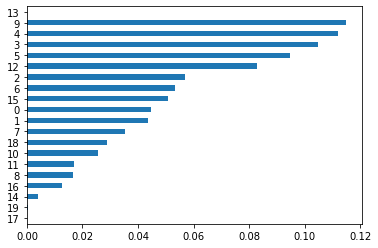

In [38]:
pd.Series(adaboost_tree.feature_importances_).sort_values().plot(kind="barh")

In [21]:
adaboost_tree_test_score

array([[0.56333333],
       [0.57166667],
       [0.475     ],
       [0.54      ],
       [0.59166667],
       [0.59333333],
       [0.59833333],
       [0.63833333],
       [0.645     ],
       [0.65166667],
       [0.64833333],
       [0.66166667],
       [0.65833333],
       [0.67166667],
       [0.67833333],
       [0.66666667],
       [0.67      ],
       [0.66333333],
       [0.66833333],
       [0.665     ]])

In [22]:
from sklearn.ensemble import BaggingClassifier
bagging_adaboost_train_score=np.zeros([20,1])
bagging_adaboost_test_score=np.zeros([20,1])
for i in range(1,21):
    bagging_adaboost=BaggingClassifier(base_estimator=(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=i), n_estimators=100)),n_jobs=-1)
    bagging_adaboost.fit(train_x,train_y)
    bagging_adaboost_train_score[i-1]=bagging_adaboost.score(train_x,train_y)
    bagging_adaboost_test_score[i-1]=bagging_adaboost.score(test_x,test_y)

Text(0, 0.5, 'score')

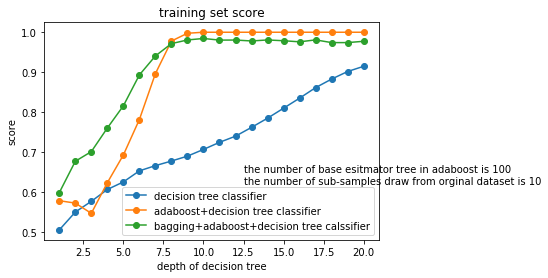

In [23]:
plt.plot(range(1,21),simple_tree_train_score,'o-',range(1,21),adaboost_tree_train_score,'o-',range(1,21),bagging_adaboost_train_score,'o-')
plt.legend(["decision tree classifier","adaboost+decision tree classifier","bagging+adaboost+decision tree calssifier"])
plt.text(12.5,0.65,"the number of base esitmator tree in adaboost is 100")
plt.text(12.5,0.62,"the number of sub-samples draw from orginal dataset is 10")
plt.title("training set score")
plt.xlabel("depth of decision tree")
plt.ylabel("score")

Text(0, 0.5, 'score')

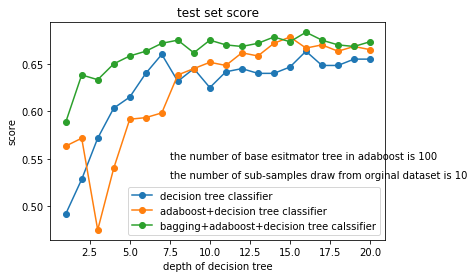

In [24]:
#0.67
plt.plot(range(1,21),simple_tree_test_score,'o-',range(1,21),adaboost_tree_test_score,'o-',range(1,21),bagging_adaboost_test_score,'o-')
plt.legend(["decision tree classifier","adaboost+decision tree classifier","bagging+adaboost+decision tree calssifier"])
plt.text(7.5,0.55,"the number of base esitmator tree in adaboost is 100")
plt.text(7.5,0.53,"the number of sub-samples draw from orginal dataset is 10")
plt.title("test set score")
plt.xlabel("depth of decision tree")
plt.ylabel("score")

In [25]:
list(range(1,7,2))

[1, 3, 5]

In [26]:
#improvement using pca
#first step: search for best base estimator number:
from sklearn.model_selection import GridSearchCV
ada=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2))
estimator_dict={"n_estimators":range(10,200,10)}
CVsearch=GridSearchCV(estimator=ada,param_grid=estimator_dict,cv=4,n_jobs=-1)
CVsearch.fit(train_x,train_y)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=2,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                                                                                min

In [27]:
CVsearch.best_params_

{'n_estimators': 30}

In [28]:
import time
time_start=time.time()
best_ada=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),n_estimators=20)
best_ada.fit(train_x,train_y)
l=best_ada.predict(test_x)
time_end=time.time()
print("train score:",best_ada.score(train_x,train_y),"test score:",best_ada.score(test_x,test_y))
print('totally cost',time_end-time_start)

train score: 0.6313840155945419 test score: 0.61
totally cost 0.9544706344604492


In [29]:
b=DecisionTreeClassifier(max_depth=2)
b.fit(train_x,train_y)
b.score(train_x,train_y)

0.5500974658869395

In [30]:
#TRY CHANGE BASE ESTIMATOR TO SVM
#from sklearn.svm import SVC
#svm=SVC(C=100,kernel='rbf')
#svm_adaboost=AdaBoostClassifier(base_estimator=svm,n_estimators=20,algorithm='SAMME',gamma="auto")
#svm_adaboost.fit(train_x,train_y)

In [31]:
from sklearn.decomposition import PCA
pca_decompo = PCA(n_components=8)
new_train_x = pca_decompo.fit_transform(train_x)
new_test_x = pca_decompo.fit_transform(test_x)
new_train_x.shape,train_x.shape

((5130, 8), (5130, 20))

In [32]:
print(pca_decompo.explained_variance_ratio_.sum())

0.9986761904152176


In [33]:
import time
time_start=time.time()
best_ada=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),n_estimators=20)
best_ada.fit(new_train_x,train_y)
l=best_ada.predict(new_test_x)
time_end=time.time()
print("train score:",best_ada.score(new_train_x,train_y),"test score:",best_ada.score(new_test_x,test_y))
print('totally cost',time_end-time_start)

train score: 0.49746588693957117 test score: 0.30666666666666664
totally cost 0.7370274066925049
